# Dimensionaalsuse vähendamine

Põhineb kursuse põhiõpiku (S. Raschka, Python Machine Learning) [peatükil 5.](https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch05/ch05.ipynb)


Vt ka [scikit-learn Decompositions dokumentatsiooni](https://scikit-learn.org/stable/modules/decomposition.html#decompositions).

## Sisukord

* [Ülesanne 6.1](#6_1)
* [Peakomponentide analüüs](#PCA_det)
* [Ülesanne 6.2](#6_2)


Dimensionaalsuse vähendamine/leidmine (*feature extraction*) tähendab uute kunstlike atribuutide defineerimist olemasolevate atribuutide kombinatsioonina. Eesmärgiks on atribuutide arvu vähendamine asendades iga tugevas positiivses/negatiivses korrelatsioonis olevate atribuutide grupi ühe uue atribuudiga.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer, load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

w_data = load_wine()
print(w_data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

PCA (*Principal Component Analysis*, peakomponentanalüüs)  leiab  uued atribuudid (dimensioonid) ehk komponendid olemasoleva $p$ atribuuti (dimensioonide) lineaarse kombinatsioonina.  $k$-ndale peakomponendile vastab kaaluvektor $\textbf{w}_{(k)} = (w_1, \ldots, w_p)_{(k)}$. 

Rea $i$ peakomponendi $k$ väärtuseks on vektorkorrutis reavektoriga $\textbf{x}_{(i)}$:
$$t_{ki} = \textbf{x}_{(i)} \cdot \textbf{w}_{(k)} = 
x_{1(i)} \cdot w_{1(k)} + \ldots + x_{p (i)} \cdot w_{p (k)} $$

Esitades algse andmestiku $r \times p$ maatriksina $X$ ja peakomponentide kaaluvektorid $p \times n$ maatriksina $W$ leiame nende maatrikskorrutisena uue teisendatud $r \times n$ maatriksi  $T$, kus $r$ on ridade arv ja $n$ on peakomponentide arv:

$$T=XW$$

In [2]:
X = StandardScaler().fit_transform(w_data.data) # proovi ilma, väga erinev
pca = PCA(n_components=5)
#pca.fit(bc_data.data)
pca.fit(X)

print("Peakomponentide maatriks")
print("(n, p):", pca.components_.shape)
print("W:\n", pca.components_)


Peakomponentide maatriks
(n, p): (5, 13)
W:
 [[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]
 [-0.20738262  0.08901289  0.6262239   0.61208035  0.13075693  0.14617896
   0.1506819   0.17036816  0.14945431 -0.13730621  0.08522192  0.16600459
  -0.12674592]
 [-0.0178563   0.53689028 -0.21417556  0.06085941 -0.35179658  0.19806835
   0.15229479 -0.20330102  0.39905653  0.06592568 -0.42777141  0.18412074
  -0.23207086]
 [-0.26566365  0.03521363 -0.14302547  0.06610294  0.72704851 -0.14931841
  -0.10902584 -0.50070298  0.13685982 -0.07643678 -0.17361452 -0.10116099
  -0.1578688 ]]


In [3]:
comp_frame = pd.DataFrame(pca.components_, columns=w_data.feature_names)
comp_frame

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
1,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903
2,-0.207383,0.089013,0.626224,0.612080,0.130757,0.146179,0.150682,0.170368,0.149454,-0.137306,0.085222,0.166005,-0.126746
3,-0.017856,0.536890,-0.214176,0.060859,-0.351797,0.198068,0.152295,-0.203301,0.399057,0.065926,-0.427771,0.184121,-0.232071
4,-0.265664,0.035214,-0.143025,0.066103,0.727049,-0.149318,-0.109026,-0.500703,0.136860,-0.076437,-0.173615,-0.101161,-0.157869


Peakomponendid on järjestatud seletatud variatsiooni alusel. Seega me teame, millised peakomponendid me peame esmajärjekorras kasutusele võtma, aga kas me soovime rohkem variatsiooni seletada suurema arvu peakomponentidega või vähem variatsiooni seletada väiksema arvu peakomponentidega on valiku koht.

In [4]:
print("Peakomponentide seletatud variatsioon")
print(pca.explained_variance_) 
print(pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_))  

Peakomponentide seletatud variatsioon
[4.73243698 2.51108093 1.45424187 0.92416587 0.85804868]
[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294] 0.801622927555479


In [5]:
X_t = pca.transform(X)
print("(r, n):", X_t.shape)
print("(X_t (valemis T):\n", X_t.round(4))

(r, n): (178, 5)
(X_t (valemis T):
 [[ 3.3168e+00 -1.4435e+00 -1.6570e-01 -2.1560e-01  6.9300e-01]
 [ 2.2095e+00  3.3340e-01 -2.0265e+00 -2.9140e-01 -2.5770e-01]
 [ 2.5167e+00 -1.0312e+00  9.8280e-01  7.2490e-01 -2.5100e-01]
 [ 3.7571e+00 -2.7564e+00 -1.7620e-01  5.6800e-01 -3.1180e-01]
 [ 1.0089e+00 -8.6980e-01  2.0267e+00 -4.0980e-01  2.9850e-01]
 [ 3.0503e+00 -2.1224e+00 -6.2940e-01 -5.1560e-01 -6.3200e-01]
 [ 2.4491e+00 -1.1749e+00 -9.7710e-01 -6.5800e-02 -1.0278e+00]
 [ 2.0594e+00 -1.6090e+00  1.4630e-01 -1.1926e+00  7.6900e-02]
 [ 2.5109e+00 -9.1810e-01 -1.7710e+00  5.6300e-02 -8.9230e-01]
 [ 2.7536e+00 -7.8940e-01 -9.8420e-01  3.4940e-01 -4.6860e-01]
 [ 3.4797e+00 -1.3023e+00 -4.2270e-01  2.6800e-02 -3.3840e-01]
 [ 1.7548e+00 -6.1200e-01 -1.1909e+00 -8.9020e-01 -7.3860e-01]
 [ 2.1135e+00 -6.7570e-01 -8.6510e-01 -3.5640e-01 -1.2099e+00]
 [ 3.4582e+00 -1.1306e+00 -1.2043e+00  1.6250e-01 -2.0231e+00]
 [ 4.3128e+00 -2.0960e+00 -1.2639e+00  3.0580e-01 -1.0297e+00]
 [ 2.3052e+00 -1.66

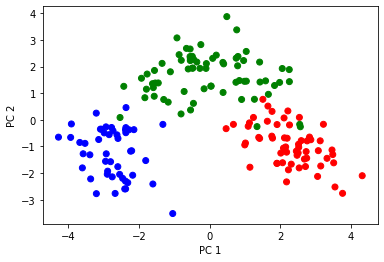

In [6]:
# Kuva objektid kahte oluliseimat komponenti pidi

import matplotlib.pyplot as plt
%matplotlib inline

colormap = {0: "red", 1: "green", 2: "blue"}

plt.scatter(X_t[:, 0], X_t[:, 1], c=[colormap[y] for y in w_data.target])
#plt.scatter(X[:, 0], X[:, 1], c=[colormap[y] for y in bc_data.target]) # juhuslikud 2 attr
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

<a id='6_1'></a>
## Ülesanne 6.1

Koostada rinnavähi andmestikule (`load_breast_cancer()`) scikit-learn alammoodulist datasets peakomponentanalüüs:
* Standardiseerida andmestik
* Leida sklearn [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)  klassi abil mitut komponenti on vaja, et seletada vähemalt 80% andmestiku varieeruvusest (PCA atribuut `explained_variance_ratio_`)
* Leida need komponendid
* Transformeerida andmestik
* Joonistada graafik (`plt.scatter()`), kus on kujutatud patsiendid kahe suurima kaaluga (omaväärtusega) peakomponenti pidi ja värviga nende klassid (0-malignant, 1-benign). 

In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


bc_data = load_breast_cancer()
print(bc_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [8]:
X = StandardScaler().fit_transform(bc_data.data) # proovi ilma, väga erinev
pca = PCA(n_components=5)
# pca.fit(bc_data.data)
pca.fit(X)
print(pca.components_)
print()
print("(n, p):", pca.explained_variance_ratio_)

[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825723  0.14188335  0.27533947]
 [-0.00853124  0.0645499  -0.00931422  0.02869953 -0.1042919  -0.07409157
   0.00273383 -0.02556355 -0.04023993 -0.02257408  0.26848138  0.37463367
   0.26664537  0.21600653  0.30883898  0.15477972  0.17646375  0.22465757
   0.28858429  0.21150375 -0.04750699

In [9]:
# Kui n_components = 5, siis 0.44272026 + 0.18971182 + 0.09393163 + 0.06602135 + 0.05495768 = 0.84734274, mis on üle 80%
print("Peakomponentide seletatud variatsioon")
print(pca.explained_variance_) 
print(pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_))  

comp_frame = pd.DataFrame(pca.components_, columns=bc_data.feature_names)
comp_frame # need 5 komponenti, mis olid vajalikud

Peakomponentide seletatud variatsioon
[13.30499079  5.7013746   2.82291016  1.98412752  1.65163324]
[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768] 0.847342743167364


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
2,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074092,0.002734,-0.025564,-0.040240,-0.022574,...,-0.047507,-0.042298,-0.048547,-0.011902,-0.259798,-0.236076,-0.173057,-0.170344,-0.271313,-0.232791
3,0.041409,-0.603050,0.041983,0.053434,0.159383,0.031795,0.019123,0.065336,0.067125,0.048587,...,0.015417,-0.632808,0.013803,0.025895,0.017652,-0.091328,-0.073951,0.006007,-0.036251,-0.077053
4,0.037786,-0.049469,0.037375,0.010331,-0.365089,0.011704,0.086375,-0.043861,-0.305941,-0.044424,...,-0.004406,-0.092883,0.007454,-0.027391,-0.324435,0.121804,0.188519,0.043332,-0.244559,0.094423


In [10]:
X_t = pca.transform(X)
print("(r, n):", X_t.shape)
print("(X_t (valemis T):\n", X_t.round(4))

(r, n): (569, 5)
(X_t (valemis T):
 [[ 9.1928  1.9486 -1.1232  3.6337 -1.1951]
 [ 2.3878 -3.7682 -0.5293  1.1183  0.6218]
 [ 5.7339 -1.0752 -0.5517  0.9121 -0.1771]
 ...
 [ 1.2562 -1.9023  0.5627 -2.0892  1.81  ]
 [10.3748  1.672  -1.877  -2.356  -0.0337]
 [-5.4752 -0.6706  1.4904 -2.2992 -0.1847]]


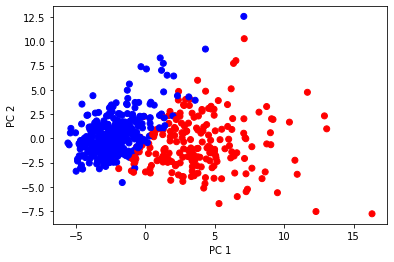

In [11]:
# Kuva objektid kahte oluliseimat komponenti pidi

import matplotlib.pyplot as plt
%matplotlib inline

colormap = {0: "red", 1: "blue"}

plt.scatter(X_t[:, 0], X_t[:, 1], c=[colormap[y] for y in bc_data.target])
# plt.scatter(X[:, 0], X[:, 1], c=[colormap[y] for y in bc_data.target]) # juhuslikud 2 attr
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

<a id='PCA_det'></a>
## Peakomponentide analüüs

Sammud:

* Standardiseeri $d$-dimensionaalne (atribuudiga) andmestik $X$
* Konstrueeri $d \times d$ atribuutide kovariatsioonimaatriks $\Sigma$
* Leia $\Sigma$ omavektorid ja omaväärtused
* Vali $k$ suurimale omaväärtusele vastavat omavektorit ja konstrueeri nendest projektisoonimaatriks $W$
* Teisenda $X$ kasutades projektsioonimaatriksit $W$

Kovariatsioon $\sigma_{jk}$ atribuutide $j, k$ vahel, summeerides üle $i = 1...n$ rea ($\mu$ on keskväärtus):
    
$$ \sigma_{jk} = \frac{1}{n} \sum_{i=1}^n (x_j^{(i)} - \mu_j)(x_k^{(i)} - \mu_k)$$

Tulemuseks on kovariatsioonimaatriks *Sigma*:
    $$ \Sigma = \begin{bmatrix}
    \sigma_{11} & \sigma_{12} &  \dots  & \sigma_{1d} \\
    \sigma_{21} & \sigma_{22} &  \dots  & \sigma_{2d} \\
    \vdots & \vdots &  \ddots & \vdots \\
    \sigma_{d1} & \sigma_{d2}  & \dots  & \sigma_{dd}
\end{bmatrix} $$

In [12]:
# # Loo kovariatsioonimaatriks

# kov = np.cov(X.T)
# print(kov.shape)
# display(pd.DataFrame(kov, columns=w_data.feature_names, index=w_data.feature_names))



Omaväärtus $\lambda$ ja omavektor $\mathbf{v}$ on lahendid järgmisele võrrandile:

$$ \Sigma \mathbf{v} = \lambda \mathbf{v} $$

see tähendab pikemalt:


$$\begin{bmatrix}
\sigma_{11} v_1 + \sigma_{12} v_2 +  \dots  + \sigma_{1d} v_d \\
\sigma_{21} v_1 + \sigma_{22} v_2 +  \dots  + \sigma_{2d} v_d \\
\vdots  \\
\sigma_{d1} v_1 + \sigma_{d2} v_2 + \dots  + \sigma_{dd} v_d
\end{bmatrix} = \begin{bmatrix} \lambda v_1 \\ \lambda v_2 \\ \vdots \\ \lambda v_d\end{bmatrix} $$



Omavektorite ja omaväärtuste osas võib lisaks vaadata ka P. Puusempa Lineaaralgebra õpikut või [3Blue1Brown omavektorite YT videot](https://youtu.be/PFDu9oVAE-g).

In [13]:
# oma_vrt, oma_vkt = np.linalg.eig(kov)
# print(oma_vrt)
# #NB! omavektorid on veerud!
# display(pd.DataFrame(oma_vkt, index=w_data.feature_names))

In [14]:
# W = oma_vkt[:, :5] # Vali 5 veergu
# X_s = X @ W # Teisenda maatriks X (13 atribuuti) viie peakomponendi (uue atribuudi) kujule
# print(X_s.shape)

In [15]:
# plt.scatter(X_s[:, 0], X_s[:, 1], c=[colormap[y] for y in w_data.target])
# plt.xlabel('PC 1')
# plt.ylabel('PC 2')
# plt.show()

Peakomponendid on ortogonaalsed vektorid, st nende omavaheline vektorkorrutis peab olema null, mida me järgnevalt kontrollime.

In [16]:
# Lisa komponentide maatriksile dimensioonid, 
# tekitades "lamava" ja "püstise" versiooni, 
# millevaheline .dot() operatsioon korrutab 
# kõik reavektorite kombinatsioonid  
row_dot = np.dot(pca.components_[None, :, :], pca.components_[:, :, None])
# eemalda tulemusest "tühjad" dimensioonid
row_dot = row_dot.squeeze()
# Näita ümardatud väljundit
row_dot.round(4)

array([[ 1.,  0.,  0.,  0., -0.],
       [ 0.,  1., -0.,  0.,  0.],
       [ 0., -0.,  1., -0., -0.],
       [ 0.,  0., -0.,  1.,  0.],
       [-0.,  0., -0.,  0.,  1.]])

<a id='6_2'></a>
## Ülesanne 6.2

Jätkata tööd ülesande 6.1 andmestikuga:
* Kui jätta ära andmestiku standardiseerimine, siis kuidas muutuvad tulemused?
* Jagada algsed ja transformeeritud andmed treening ja testandmeteks ([train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)) ja kasutada nii algsete kui transformeeritud andmete peal mõnda klassifikaatorit (näiteks [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Kummal juhul on klassifikaatori tulemused paremad?
* Leida standardiseeritud andmestiku pealt kovariatsioonimaatriks ([numpy.cov()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html)). Kas atribuutidevahelised kovariatsioonid on valdavalt positiivsed või negatiivsed? Mis on atribuutide indeksitega 0 ja 1 kovariatsioon?
* Leida selle kovariatsioonimaatriksi omaväärtused ja omavektorid ([numpy.linalg.eig()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html)). NB! omavektorid on väljastatud omavektorite maatriksi **veerud**. Kas need vastavad sklearn.PCA klassi leitud peakomponentidele?



In [17]:
from sklearn.model_selection import train_test_split

X = bc_data.data
y = bc_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("Treeningklassid:", y_train)
print("\nTestklassid:", y_test)

Treeningklassid: [1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1
 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1
 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0
 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1
 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1
 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1
 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1]

Testklassid: [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 1 1 1 1 

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron, LogisticRegression

sc = StandardScaler()
sc.fit(X_train)

predictive_model = LogisticRegression(solver='lbfgs', max_iter=10000) # actually a classification, not regression
predictive_model.fit(X_train, y_train)
y_pred = predictive_model.predict(X_test)
print("Täpsus:", accuracy_score(y_test, y_pred))

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
predictive_model.fit(X_train_std, y_train)
y_pred = predictive_model.predict(X_test_std)
print("Täpsus transformeeritud:", accuracy_score(y_test, y_pred))
print("Tulemused on paremad transformeeritud andmete peal")

Täpsus: 0.9590643274853801
Täpsus transformeeritud: 0.9766081871345029
Tulemused on paremad transformeeritud andmete peal


In [19]:
# Loo kovariatsioonimaatriks

X = StandardScaler().fit_transform(bc_data.data)
kov = np.cov(X.T)
print(kov.shape)
display(pd.DataFrame(kov, columns=bc_data.feature_names, index=bc_data.feature_names))
# Diagnaalis on ühed, mis on ka loogiline
# Atribuutidevahelised kovariatsioonid on valdavalt positiivsed
# atribuutide indeksitega 0 ja 1 kovariatsioon on

(30, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.001761,0.324352,0.999612,0.989095,0.170882,0.507015,0.677955,0.823977,0.148001,-0.312179,...,0.971246,0.297531,0.966836,0.942739,0.119827,0.414191,0.527839,0.745524,0.164242,0.007078
mean texture,0.324352,1.001761,0.330113,0.321651,-0.023430,0.237119,0.302950,0.293981,0.071527,-0.076572,...,0.353194,0.913650,0.358670,0.344151,0.077640,0.278319,0.301555,0.295836,0.105193,0.119415
mean perimeter,0.999612,0.330113,1.001761,0.988244,0.207643,0.557917,0.717396,0.852475,0.183349,-0.261937,...,0.971183,0.303572,0.972095,0.943207,0.150814,0.456577,0.564872,0.772599,0.189448,0.051108
mean area,0.989095,0.321651,0.988244,1.001761,0.177340,0.499379,0.687191,0.824718,0.151559,-0.283608,...,0.964441,0.287995,0.960808,0.960902,0.123740,0.391098,0.513508,0.723288,0.143823,0.003744
mean smoothness,0.170882,-0.023430,0.207643,0.177340,1.001761,0.660284,0.522903,0.554670,0.558757,0.585822,...,0.213495,0.036135,0.239273,0.207082,0.806742,0.473300,0.435691,0.503939,0.395004,0.500195
mean compactness,0.507015,0.237119,0.557917,0.499379,0.660284,1.001761,0.884675,0.832598,0.603702,0.566364,...,0.536258,0.248570,0.591250,0.510501,0.566537,0.867333,0.817712,0.817009,0.511122,0.688593
mean concavity,0.677955,0.302950,0.717396,0.687191,0.522903,0.884675,1.001761,0.923013,0.501548,0.337376,...,0.689448,0.300407,0.730849,0.677177,0.449612,0.756297,0.885659,0.862839,0.410185,0.515836
mean concave points,0.823977,0.293981,0.852475,0.824718,0.554670,0.832598,0.923013,1.001761,0.463312,0.167211,...,0.831779,0.293267,0.857430,0.811055,0.453550,0.668629,0.753724,0.911758,0.376406,0.369310
mean symmetry,0.148001,0.071527,0.183349,0.151559,0.558757,0.603702,0.501548,0.463312,1.001761,0.480766,...,0.186055,0.090810,0.219554,0.177505,0.427426,0.474033,0.434485,0.431054,0.701058,0.439185
mean fractal dimension,-0.312179,-0.076572,-0.261937,-0.283608,0.585822,0.566364,0.337376,0.167211,0.480766,1.001761,...,-0.254138,-0.051359,-0.205512,-0.232263,0.505831,0.459606,0.346843,0.175634,0.334607,0.768648


In [20]:
oma_vrt, oma_vkt = np.linalg.eig(kov)
display(pd.DataFrame(oma_vkt, index=bc_data.feature_names))

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
mean radius,0.218902,-0.233857,-0.008531,0.041409,-0.037786,0.018741,0.124088,0.007452,-0.223110,0.095486,...,0.211460,-0.211194,-0.131527,0.129476,0.019226,-0.182579,0.098553,-0.072929,-0.049699,0.068570
mean texture,0.103725,-0.059706,0.064550,-0.603050,0.049469,-0.032179,-0.011400,-0.130675,0.112699,0.240934,...,-0.010534,0.000066,-0.017357,0.024557,-0.084746,0.098787,0.000555,-0.094801,-0.244135,-0.448369
mean perimeter,0.227537,-0.215181,-0.009314,0.041983,-0.037375,0.017308,0.114477,0.018687,-0.223739,0.086386,...,0.383826,-0.084338,-0.115415,0.125256,-0.027015,-0.116649,0.040245,-0.075160,-0.017665,0.069769
mean area,0.220995,-0.231077,0.028700,0.053434,-0.010331,-0.001888,0.051653,-0.034674,-0.195586,0.074956,...,-0.422795,0.272508,0.466612,-0.362727,0.210041,0.069848,-0.007777,-0.097566,-0.090144,0.018443
mean smoothness,0.142590,0.186113,-0.104292,0.159383,0.365089,-0.286374,0.140669,0.288975,0.006425,-0.069293,...,-0.003435,-0.001479,0.069690,0.037004,-0.028955,0.068697,0.020666,-0.063823,0.017101,0.119492
mean compactness,0.239285,0.151892,-0.074092,0.031795,-0.011704,-0.014131,-0.030918,0.151396,-0.167841,0.012936,...,-0.041017,0.005463,0.097749,-0.262808,-0.396623,-0.104136,-0.052360,0.098078,0.488686,-0.192621
mean concavity,0.258400,0.060165,0.002734,0.019123,-0.086375,-0.009344,0.107520,0.072827,0.040591,-0.135602,...,-0.010015,-0.045539,0.364808,0.548876,0.096977,0.044741,-0.324870,0.185212,-0.033387,-0.005572
mean concave points,0.260854,-0.034768,-0.025564,0.065336,0.043861,-0.052050,0.150482,0.152322,-0.111971,0.008055,...,-0.004207,0.008883,-0.454699,-0.387643,0.186452,0.084028,0.051409,0.311852,-0.235408,0.009424
mean symmetry,0.138167,0.190349,-0.040240,0.067125,0.305941,0.356458,0.093891,0.231531,0.256040,0.572069,...,-0.007570,-0.001433,-0.015165,0.016044,0.024584,0.019339,0.051201,0.018407,0.026069,0.086938
mean fractal dimension,0.064363,0.366575,-0.022574,0.048587,0.044424,-0.119431,-0.295760,0.177121,-0.123741,0.081103,...,0.007301,0.006312,-0.101245,0.097405,0.207222,-0.133261,0.084690,-0.287869,-0.175637,0.076272


(569, 5)


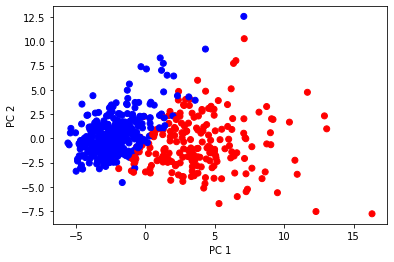

In [21]:
W = oma_vkt[:, :5] # Vali 5 veergu
X_s = X @ W # Teisenda maatriks X (13 atribuuti) viie peakomponendi (uue atribuudi) kujule
print(X_s.shape)

plt.scatter(X_s[:, 0], X_s[:, 1], c=[colormap[y] for y in bc_data.target])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [22]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

bc_data = load_breast_cancer()
pca = PCA(n_components=5)
pca.fit(bc_data.data)
print("(n, p):", pca.explained_variance_ratio_) # Esimene 98% ja teised on kopikad

(n, p): [9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04
 8.82724536e-05]


In [23]:
print("Peakomponentide seletatud variatsioon")
print(pca.explained_variance_) 
print(pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_)) 

comp_frame = pd.DataFrame(pca.components_, columns=bc_data.feature_names)
comp_frame # need 5 komponenti, mis olid vajalikud

Peakomponentide seletatud variatsioon
[4.43782605e+05 7.31010006e+03 7.03833742e+02 5.46487379e+01
 3.98900178e+01]
[9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04
 8.82724536e-05] 0.9999878765363119


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.005086,0.002197,0.035076,0.516826,0.000004,0.000041,0.000082,0.000048,0.000007,-0.000003,...,0.007155,0.003067,0.049458,0.852063,0.000006,0.000101,0.000169,0.000074,0.000018,0.000002
1,0.009287,-0.002882,0.062748,0.851824,-0.000015,-0.000003,0.000075,0.000046,-0.000025,-0.000016,...,-0.000569,-0.013215,-0.000186,-0.519742,-0.000077,-0.000256,-0.000175,-0.000031,-0.000157,-0.000055
2,-0.012343,-0.006355,-0.071669,-0.027894,0.000073,0.000102,0.000266,0.000036,0.000141,0.000051,...,-0.015566,-0.031545,-0.092313,-0.039319,-0.000042,-0.000765,-0.000847,-0.000334,-0.000350,-0.000041
3,-0.034238,-0.362415,-0.329281,0.039412,-0.000344,-0.003005,-0.003408,-0.001247,-0.000967,-0.000199,...,-0.061900,-0.542057,-0.666816,0.038769,-0.000722,-0.010362,-0.011562,-0.002995,-0.002641,-0.000909
4,0.035456,-0.443187,0.313383,-0.046038,0.000579,0.002526,0.002195,0.001132,0.000937,0.000207,...,0.053145,-0.612574,0.564103,-0.018453,0.000465,0.006096,0.006165,0.002412,0.001883,0.000520


(r, n): (569, 5)


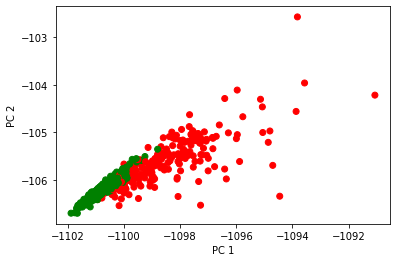

In [24]:
X_t = pca.transform(X)
print("(r, n):", X_t.shape)

import matplotlib.pyplot as plt
%matplotlib inline

colormap = {0: "red", 1: "green", 2: "blue"}

plt.scatter(X_t[:, 0], X_t[:, 1], c=[colormap[y] for y in bc_data.target])
# plt.scatter(X[:, 0], X[:, 1], c=[colormap[y] for y in bc_data.target]) # juhuslikud 2 attr
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()